# **Влияние инфляции на изменение заработной платы**


# **Описание работы**

В данной работе исследуется влияние инфляции год к году на изменение заработной платы по видам экономической деятельности, обеспечивающихся из федерального бюджета: государственное управление, образование, здравоохранение

---

*   Источник данных о номинальной заработной плате: https://www.rosstat.gov.ru/labor_market_employment_salaries#
*   Источник данных об индексе потребительских цен: https://app.2lead.ru/index_potrebitelskih_cen_rosstat/?ysclid=mby3km4d2e747262478
---
Реальная заработная плата рассчитывается как номинальная заработная плата за период t, деленная на отношение ИПЦ за период t к ИПЦ за период t-1:
**nominal_wage_t / (CPI_t / CPI_t-1)**







# **Необходимые библиотеки и данные**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Номинальные зарплаты**

In [3]:
data = pd.read_excel('nominal_wage.xlsx')
data.head()

,Отрасль,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,...,34030,36709,39167.0,43724,47866.8,51344,57243.7,65338.3,74854.0,89069.3
1,"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,...,19721,21755,25671.1,28699,31727.6,34770,39436.8,46777.0,54158.1,65129.3
2,"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,...,46676,54927,68032.0,75766,88603.8,94983,101547.4,121726.2,143135.1,154237.6
3,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,...,63695,69936,74474.1,83178,89343.7,95359,103473.5,118375.7,131588.4,156081.8
4,добыча топливно-энергетических полезных иск...,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,...,71418,77586,157143.3,187210,198716.5,204775,223161.7,256340.3,287551.6,339642.9


### **Индекс потребительских цен**

In [4]:
cpi = pd.read_excel('CPI.xlsx')
cpi.head()

,Год,ИПЦ
0,1992,2608.84
1,1993,939.90
2,1994,315.14
3,1995,231.30
4,1996,121.81


# **Государственное управление**

## **Датасет**

In [6]:
name = data['Отрасль'].loc[26]
gos = data[data['Отрасль'] == name]
gos = gos.T.reset_index().drop(0)
gos.rename(columns = {'index': 'Год', 26: 'nominal wage'}, inplace = True)
gos['real wage'] = gos.apply(lambda row: row['nominal wage']/(cpi[cpi['Год'] == row['Год']]['ИПЦ'].values[0]/cpi[cpi['Год'] == row['Год']-1]['ИПЦ'].values[0]), axis = 1)
gos.head()

,Год,nominal wage,real wage
1,2000,2712.1,3081.070170
2,2001,3754.9,3805.564868
3,2002,5200.4,5359.494455
4,2003,6913.8,7103.329119
5,2004,7898.6,7916.980345


In [16]:
gos[(gos['Год'] == 2017) | (gos['Год'] == 2024)]

,Год,nominal wage,real wage
18,2017,43499.7,44721.816242
25,2024,84956.1,83327.102465


## **Номинальная зарплата**

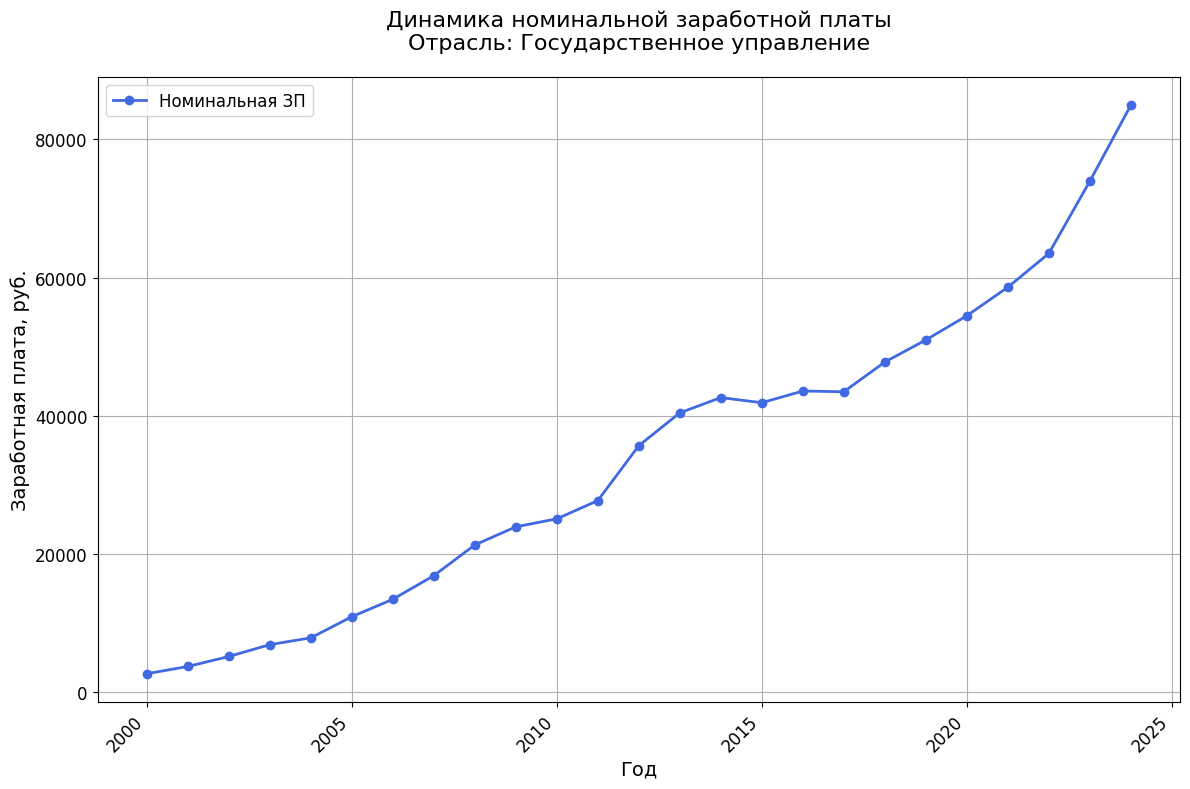

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

df = gos
industry_name = 'Государственное управление'


ax.plot(df['Год'], df['nominal wage'],
        marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6,
        label=f'Номинальная ЗП')

ax.set_title(f'Динамика номинальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()


## **Реальная зарплата**

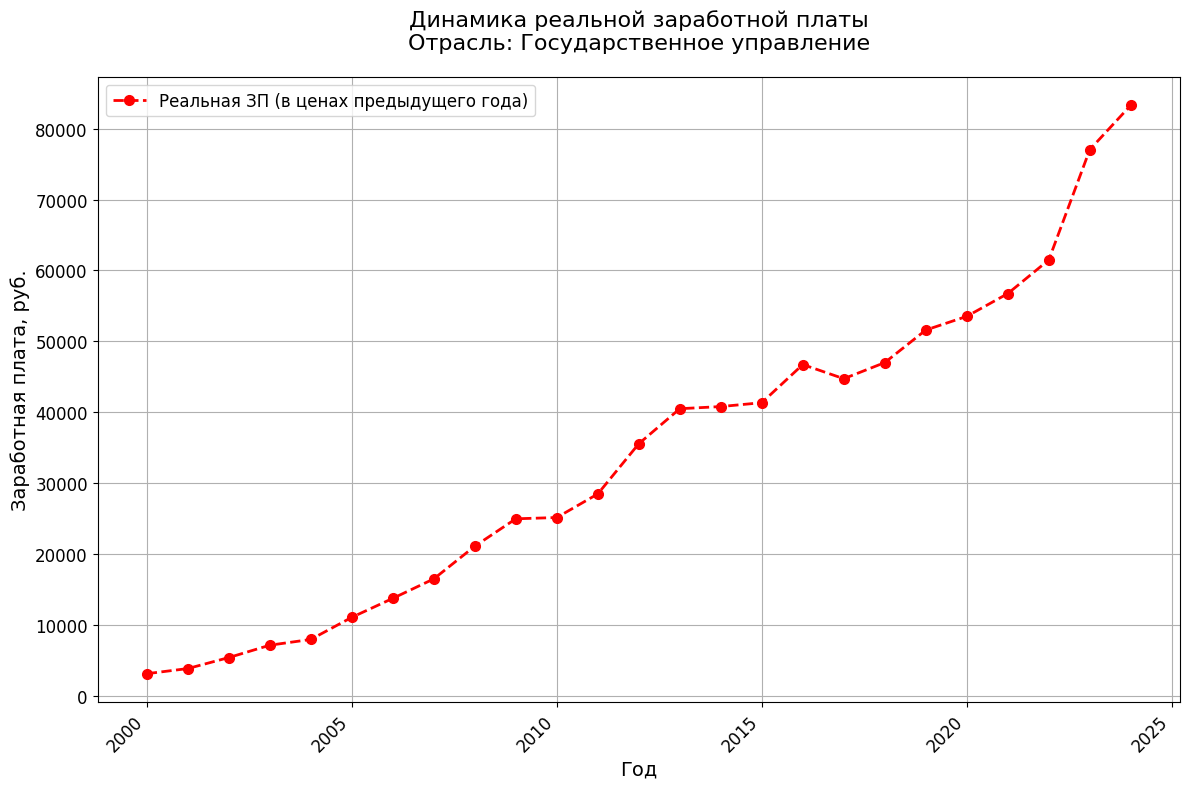

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))

df = gos
industry_name = 'Государственное управление'


ax.plot(df['Год'], df['real wage'],
        marker='o', linestyle='--', color='red', linewidth=2, markersize=7,
        label=f'Реальная ЗП (в ценах предыдущего года)')

ax.set_title(f'Динамика реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()


## **Сравнение реальной и номинальной зарплаты**

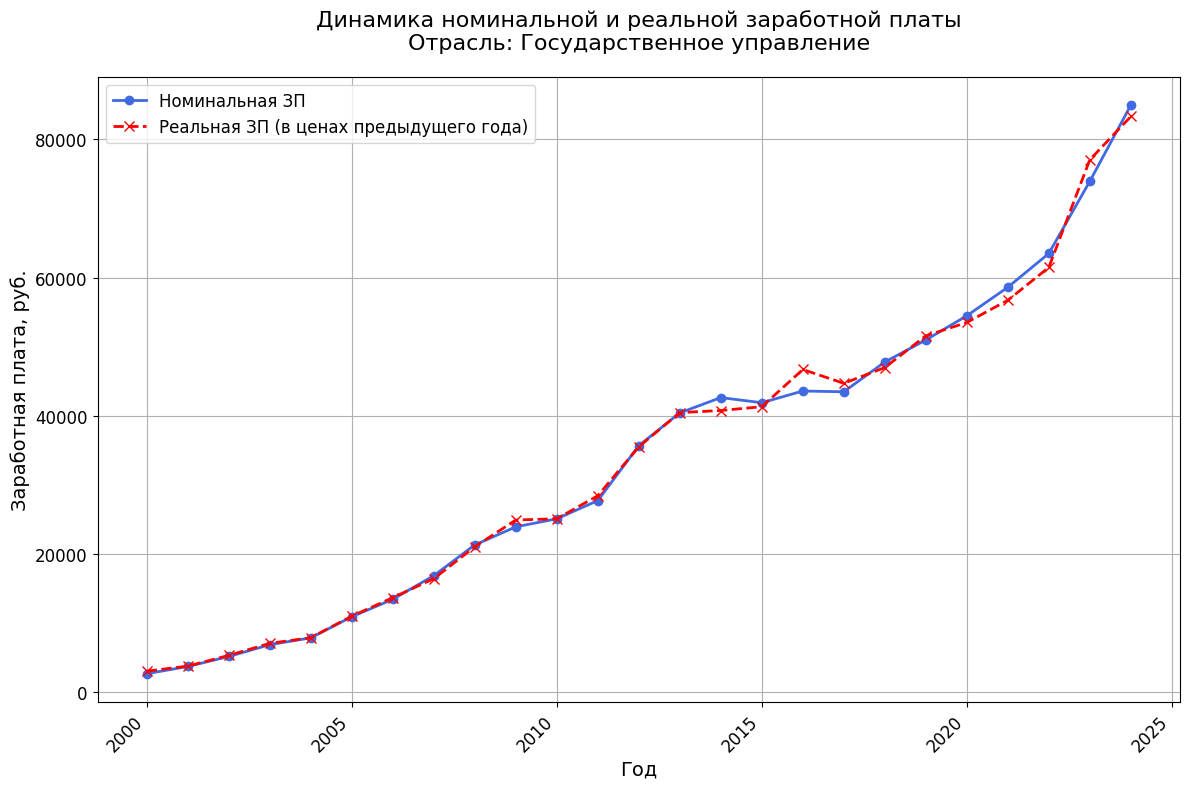

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

df = gos
industry_name = 'Государственное управление'


ax.plot(df['Год'], df['nominal wage'],
        marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6,
        label=f'Номинальная ЗП')

ax.plot(df['Год'], df['real wage'],
        marker='x', linestyle='--', color='red', linewidth=2, markersize=7,
        label=f'Реальная ЗП (в ценах предыдущего года)')

ax.set_title(f'Динамика номинальной и реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()


<ipython-input-45-3600064651>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12, loc='upper left')


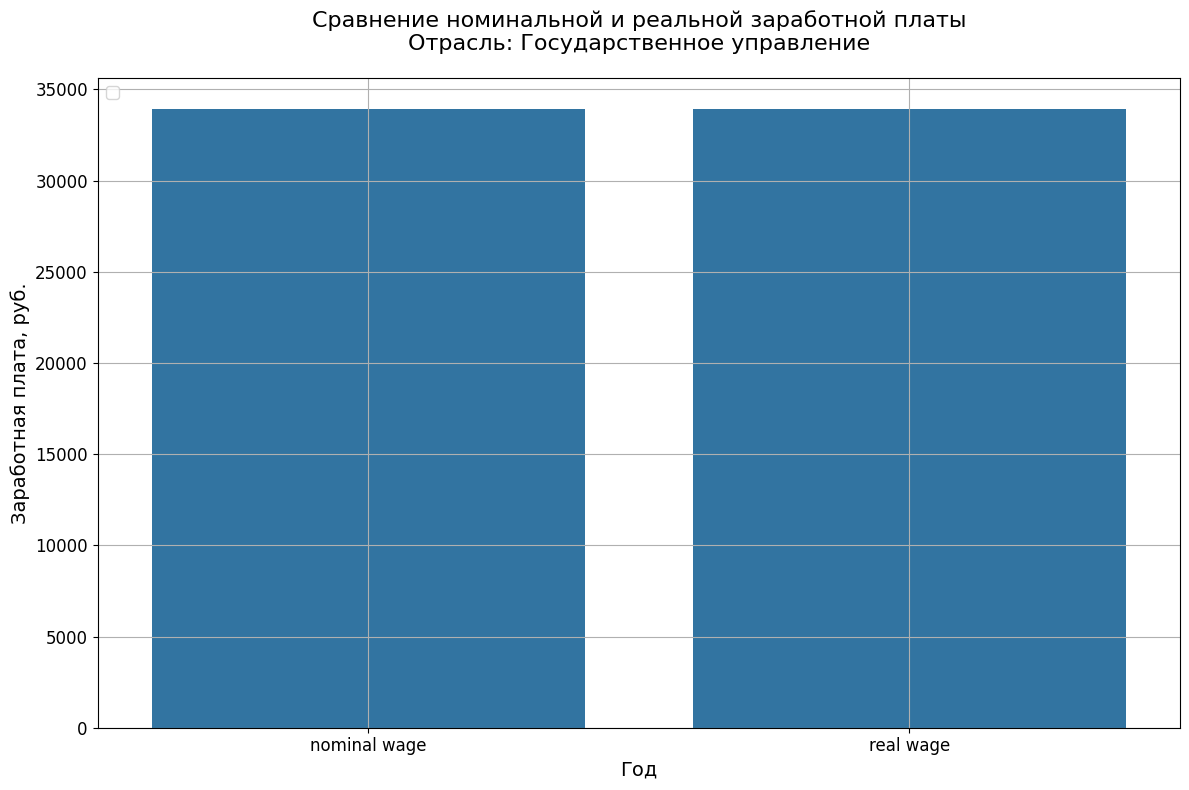

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

df = gos
industry_name = 'Государственное управление'

sns.barplot(gos[['nominal wage', 'real wage']].mean())

ax.set_title(f'Сравнение номинальной и реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)



plt.tight_layout()

**Выводы**

---

Номинальная заработная плата в сфере государственного управления стабильно росла на протяжении всего рассматриваемого периода, период с 2013 по 2017 год она вышла на плато в районе 40 000 рублей, а затем начала резко расти вплоть до 2024 года, увеличившись практически в два раза за 7 лет: с 43 500 до 85 000 рублей

---
Реальная заработная плата на протяжении всего временного промежутка практически всегда соответствовала номинальной, можно выделить только два кризисных периода: санкции 2014-2015 гг, после которых реальная заработная плата отреагировала превышением номинальной в 2016-2017 гг, а также период пандемии коронавируса 2020-2022 гг, после которого реальная заработная плата снова последующие 2 года оказывалась немного выше номинальной.

---
Можно сделать вывод, что наиболее сильно инфляция влияла на заработные платы в периоды кризисов, в остальное время реальная и номинальная заработные платы заметно не отличались. Средние заработные платы практически не отличаются друг от друга.


# **Образование**

## **Датасет**

In [7]:
name = data['Отрасль'].loc[27]
edu = data[data['Отрасль'] == name]
edu = edu.T.reset_index().drop(0)
edu.rename(columns = {'index': 'Год', 27: 'nominal wage'}, inplace = True)
edu['real wage'] = edu.apply(lambda row: row['nominal wage']/(cpi[cpi['Год'] == row['Год']]['ИПЦ'].values[0]/cpi[cpi['Год'] == row['Год']-1]['ИПЦ'].values[0]), axis = 1)
edu.head()

,Год,nominal wage,real wage
1,2000,1240.2,1408.924164
2,2001,1833.0,1857.732670
3,2002,2927.3,3016.854111
4,2003,3386.6,3479.437414
5,2004,4203.4,4213.181473


## **Номинальные зарплаты**

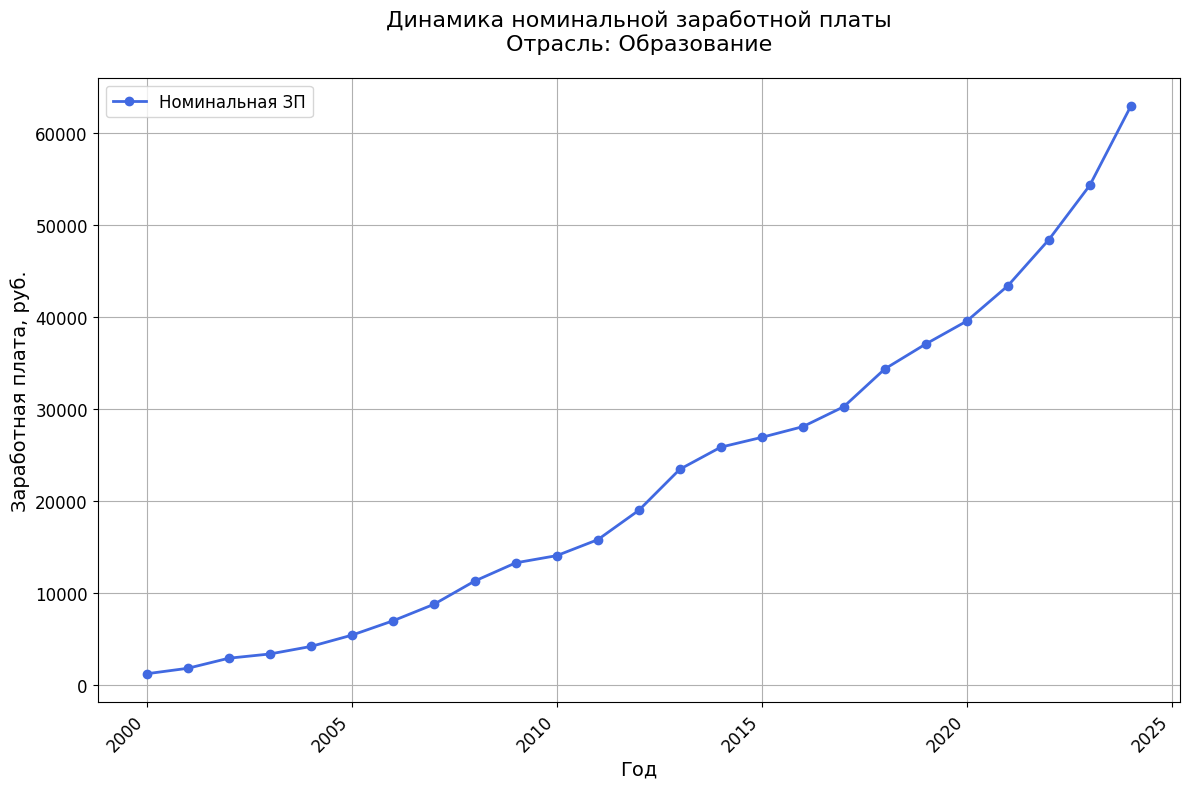

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))

df = edu
industry_name = 'Образование'


ax.plot(df['Год'], df['nominal wage'],
        marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6,
        label=f'Номинальная ЗП')


ax.set_title(f'Динамика номинальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()

## **Реальная зарплата**

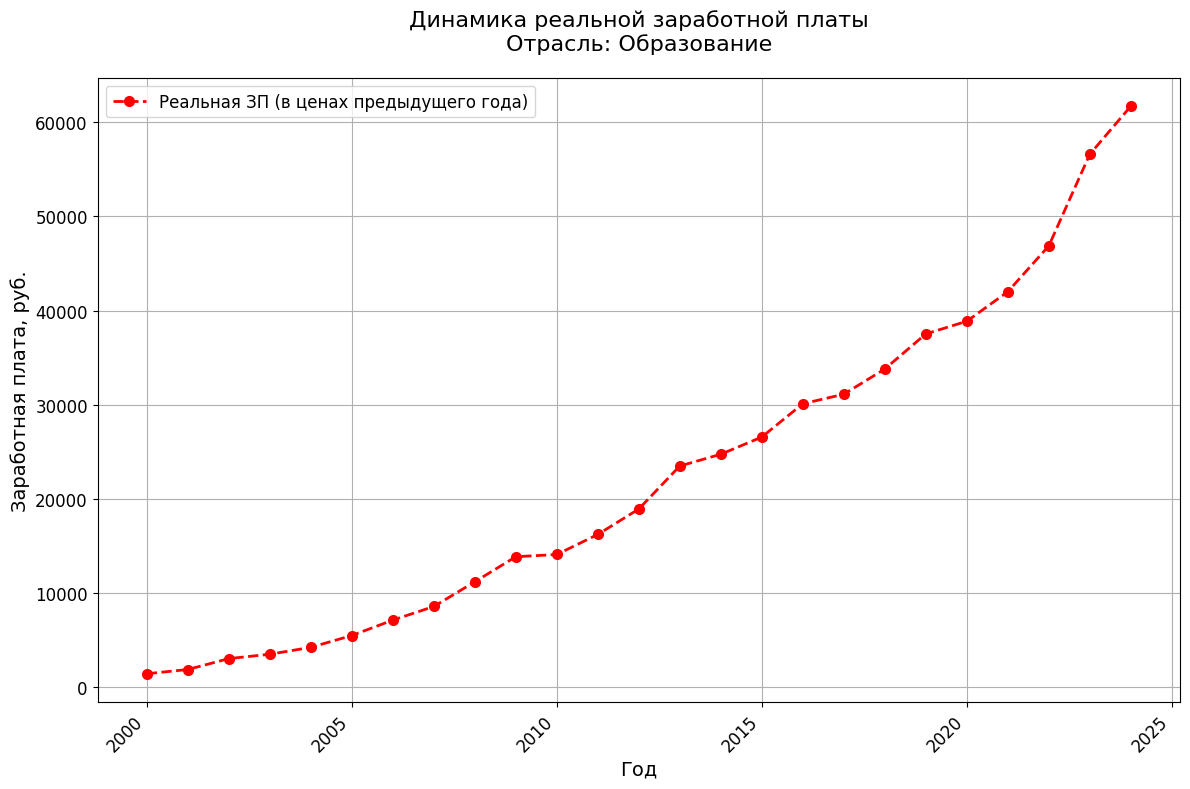

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

df = edu
industry_name = 'Образование'

ax.plot(df['Год'], df['real wage'],
        marker='o', linestyle='--', color='red', linewidth=2, markersize=7,
        label=f'Реальная ЗП (в ценах предыдущего года)')

ax.set_title(f'Динамика реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()

## **Сравнение номинальной и реальной зарплаты**

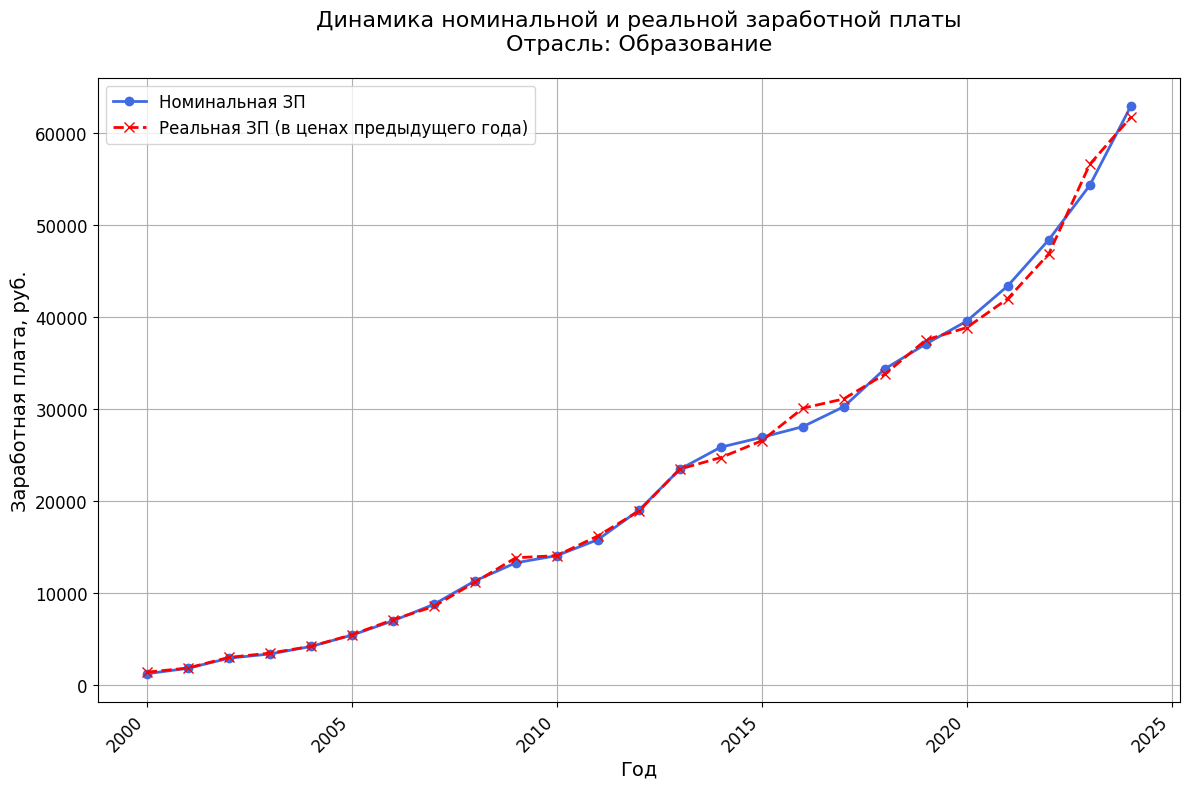

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

df = edu
industry_name = 'Образование'


ax.plot(df['Год'], df['nominal wage'],
        marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6,
        label=f'Номинальная ЗП')

ax.plot(df['Год'], df['real wage'],
        marker='x', linestyle='--', color='red', linewidth=2, markersize=7,
        label=f'Реальная ЗП (в ценах предыдущего года)')

ax.set_title(f'Динамика номинальной и реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()

<ipython-input-48-1598504542>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12, loc='upper left')


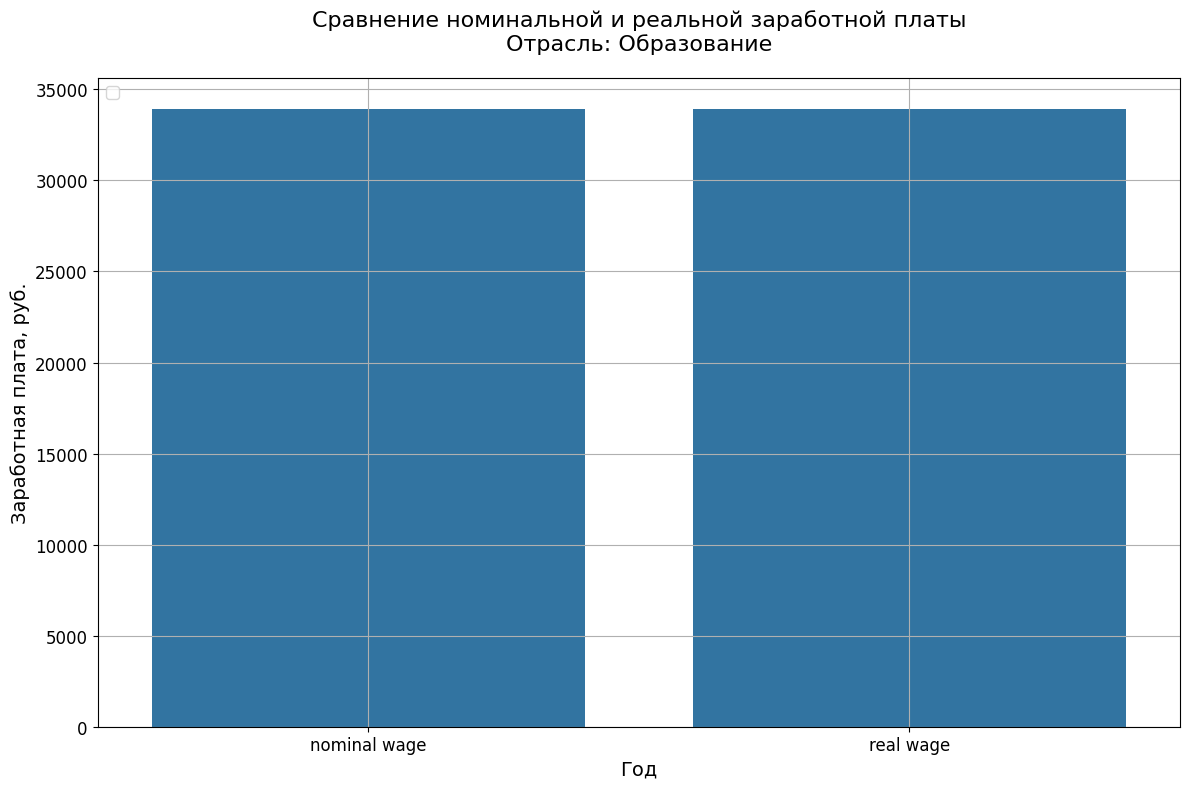

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))

df = edu
industry_name = 'Образование'

sns.barplot(gos[['nominal wage', 'real wage']].mean())

ax.set_title(f'Сравнение номинальной и реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)



plt.tight_layout()

**Выводы**

---
Номинальная заработная плата в сфере образования стабильно росла с 2000 по 2013 год, в период с 2013 по 2017 год рост ощутимо замедлился и составил порядка 17% рублей за 4 года, а она затем начала резко расти вплоть до 2024 года, увеличившись в два раза за 7 лет

---
Реальная заработная плата на протяжении всего временного промежутка практически всегда соответствовала номинальной, можно выделить только два кризисных периода: санкции 2014-2015 гг, после которых реальная заработная плата отреагировала превышением номинальной в 2016-2017 гг, а также период пандемии коронавируса 2020-2022 гг, после которого реальная заработная плата снова последующие 2 года оказывалась немного выше номинальной.

---
Можно сделать вывод, что наиболее сильно инфляция влияла на заработные платы в периоды кризисов, в остальное время реальная и номинальная заработные платы заметно не отличались. Средние заработные платы практически не отличаются друг от друга.


# **Здравоохранение**

## **Датасет**

In [8]:
name = data['Отрасль'].loc[28]
med = data[data['Отрасль'] == name]
med = med.T.reset_index().drop(0)
med.rename(columns = {'index': 'Год', 28: 'nominal wage'}, inplace = True)
med['real wage'] = med.apply(lambda row: row['nominal wage']/(cpi[cpi['Год'] == row['Год']]['ИПЦ'].values[0]/cpi[cpi['Год'] == row['Год']-1]['ИПЦ'].values[0]), axis = 1)
med.head()

,Год,nominal wage,real wage
1,2000,1333.3,1514.690040
2,2001,1959.9,1986.344932
3,2002,3141.3,3237.400956
4,2003,3662.6,3763.003447
5,2004,4612.0,4622.732301


## **Номинальная зарплата**

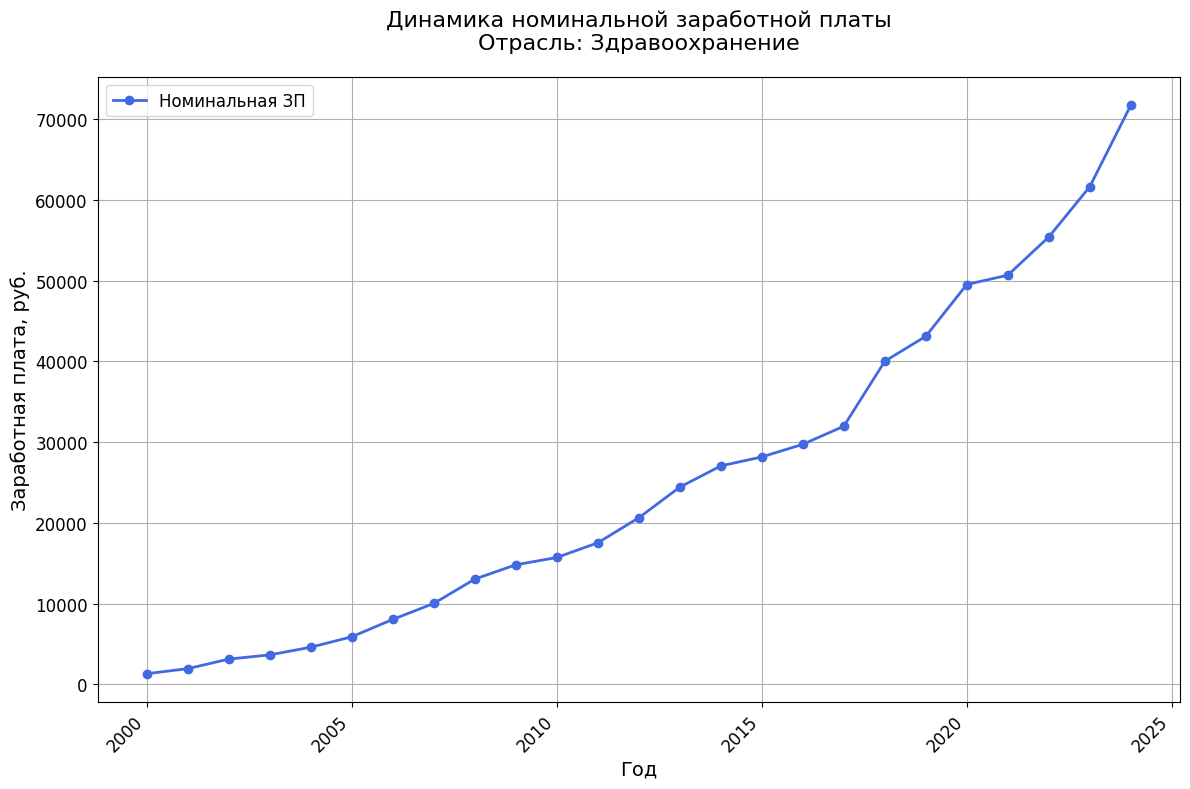

In [50]:
df = med
industry_name = 'Здравоохранение'

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df['Год'], df['nominal wage'],
        marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6,
        label=f'Номинальная ЗП')

ax.set_title(f'Динамика номинальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()

## **Реальная зарплата**

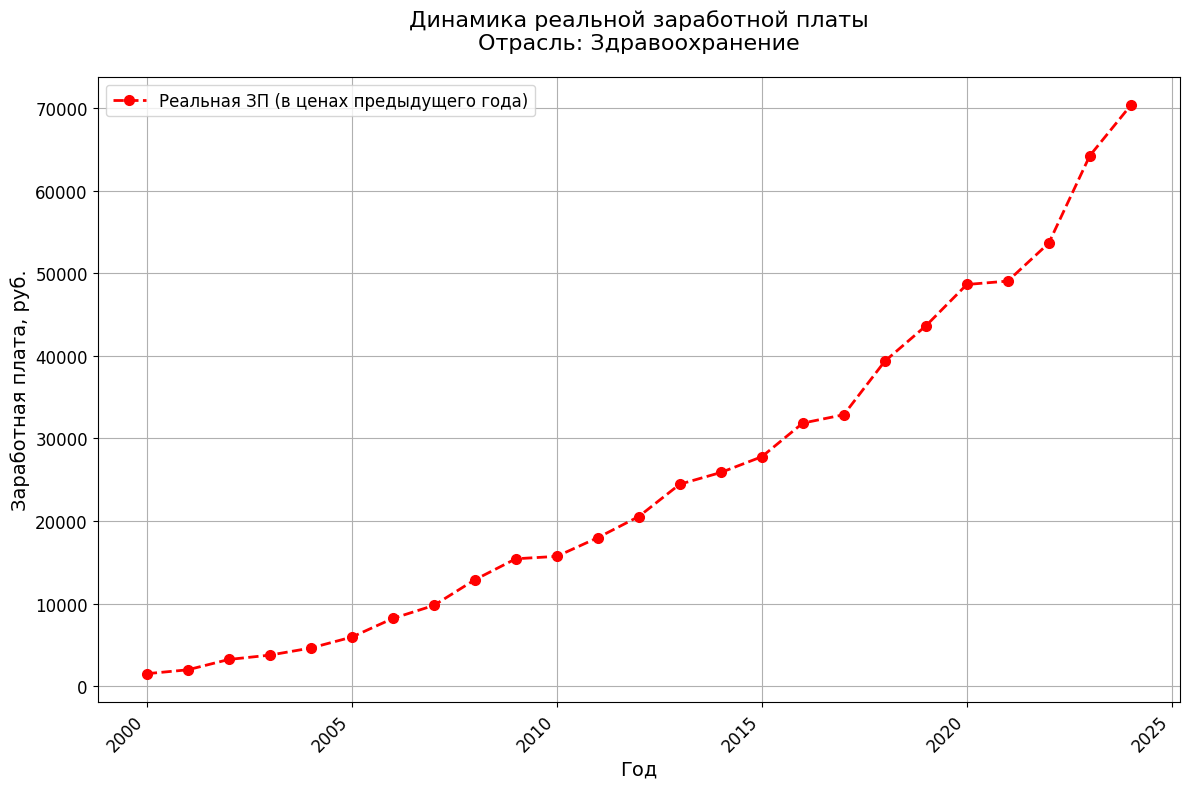

In [51]:
df = med
industry_name = 'Здравоохранение'

fig, ax = plt.subplots(figsize=(12, 8))


ax.plot(df['Год'], df['real wage'],
        marker='o', linestyle='--', color='red', linewidth=2, markersize=7,
        label=f'Реальная ЗП (в ценах предыдущего года)')

ax.set_title(f'Динамика реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()

## **График**

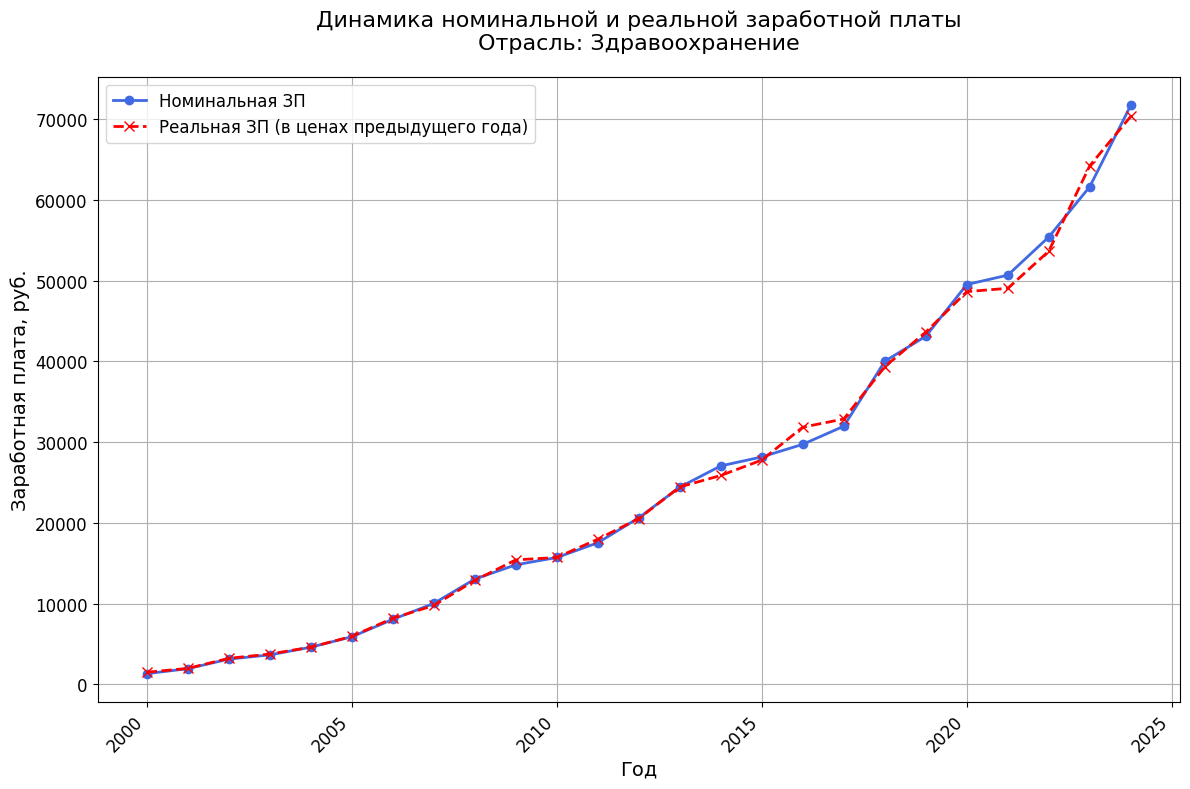

In [49]:
df = med
industry_name = 'Здравоохранение'

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(df['Год'], df['nominal wage'],
        marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6,
        label=f'Номинальная ЗП')

ax.plot(df['Год'], df['real wage'],
        marker='x', linestyle='--', color='red', linewidth=2, markersize=7,
        label=f'Реальная ЗП (в ценах предыдущего года)')

ax.set_title(f'Динамика номинальной и реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)


plt.xticks(rotation=45, ha="right")

plt.tight_layout()

<ipython-input-52-3084394153>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=12, loc='upper left')


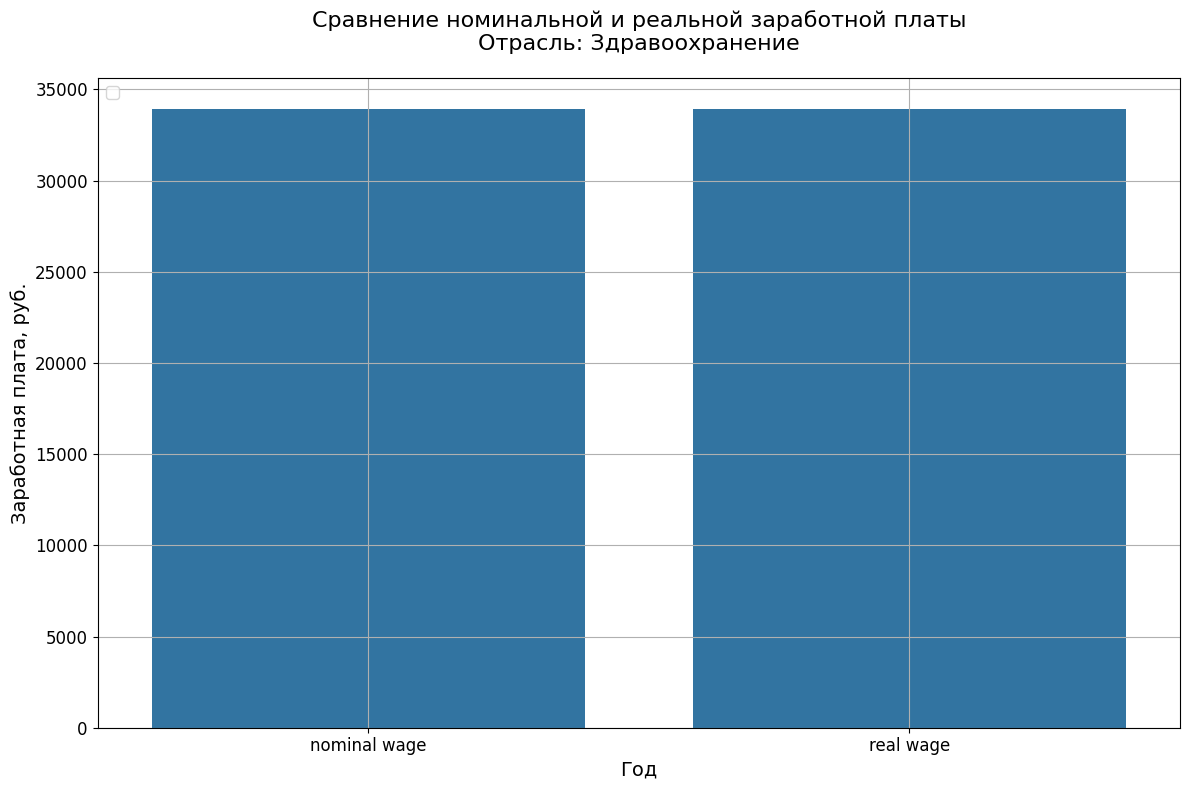

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

df = med
industry_name = 'Здравоохранение'

sns.barplot(gos[['nominal wage', 'real wage']].mean())

ax.set_title(f'Сравнение номинальной и реальной заработной платы\nОтрасль: {industry_name}', fontsize=16, pad=20)
ax.set_xlabel('Год', fontsize=14)
ax.set_ylabel('Заработная плата, руб.', fontsize=14)

ax.legend(fontsize=12, loc='upper left')

ax.grid(True)

ax.tick_params(axis='both', which='major', labelsize=12)



plt.tight_layout()

**Выводы**

---
Номинальная заработная плата в сфере здравоохранения стабильно росла с 2000 по 2013 год, в период с 2013 по 2017 год рост ощутимо замедлился и составил порядка 30% за 4 года, а затем она начала резко расти вплоть до 2024 года, увеличившись более чем в два раза за 7 лет

---
Реальная заработная плата на протяжении всего временного промежутка практически всегда соответствовала номинальной, можно выделить только два кризисных периода: санкции 2014-2015 гг, после которых реальная заработная плата отреагировала превышением номинальной в 2016-2017 гг, а также период пандемии коронавируса 2020-2022 гг, после которого реальная заработная плата снова последующие 2 года оказывалась немного выше номинальной.

---
Можно сделать вывод, что наиболее сильно инфляция влияла на заработные платы в периоды кризисов, в остальное время реальная и номинальная заработные платы заметно не отличались. Средние заработные платы практически не отличаются друг от друга.